<img src="images/01.png" alt="SADIE II" width="750"/>

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = Path.cwd().as_posix()

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import soundfile as sf

from hrtf.constant import DATA, MODEL
from hrtf.dataset import Dataset
from hrtf.interactive import Builder, Interactive
from hrtf.plot import channel, signal
from hrtf.traces import (
    ArbitraryScatterTrace,
    ListenerScatterTrace,
    MeshTrace,
    ReceiverScatterTrace,
    SourceScatterTrace,
    TransferFunctionTrace
)
from IPython.display import display
from pathlib import Path

In [3]:
plt.style.use('science')

In [4]:
path = DATA.joinpath('sample/applause.wav')
audio, rate = sf.read(path)

In [5]:
path = DATA.joinpath('rir/H3_44K_16bit_256tap_FIR_SOFA.sofa')
dataset = Dataset.load(path)
dataset.rate = rate

In [6]:
positions = {}

for i in range(dataset.database.Dimensions.M):
    position = dataset.database.Source.Position.get_values(
        indices={'M': i}, 
        system='spherical'
    ) 

    positions[i] = position

columns = [
    'azimuth',
    'elevation',
    'radius'
]

dataframe = pd.DataFrame.from_dict(
    positions, 
    columns=columns, 
    orient='index'
)

path = DATA.joinpath('source.csv')
dataframe.to_csv(path)

In [7]:
elevation = 15

## Sound playback to the left of the individual

In [8]:
left = dataframe.loc[(dataframe.azimuth == 90) & (dataframe.elevation == elevation)]

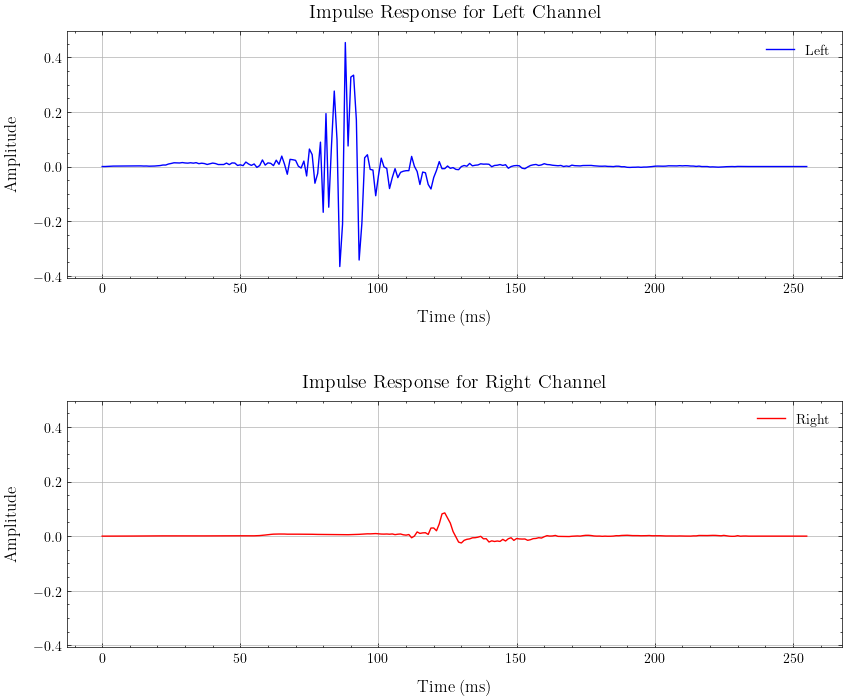

In [9]:
channel(dataset, left)

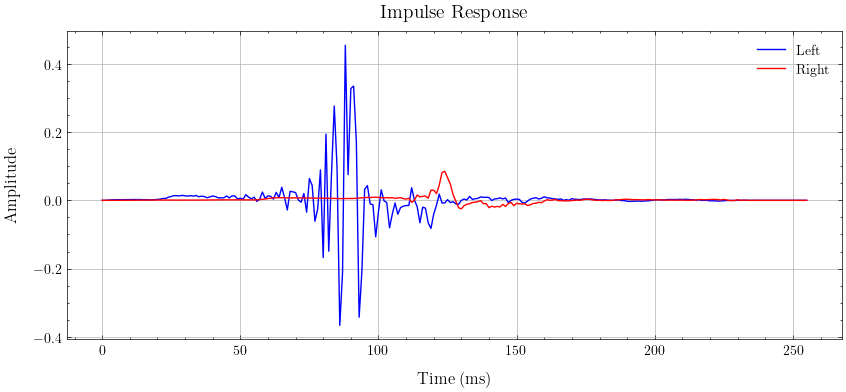

In [10]:
signal(dataset, left)

## Sound playback in front and center of the individual

In [11]:
center = dataframe.loc[(dataframe.azimuth == 0) & (dataframe.elevation == elevation)]

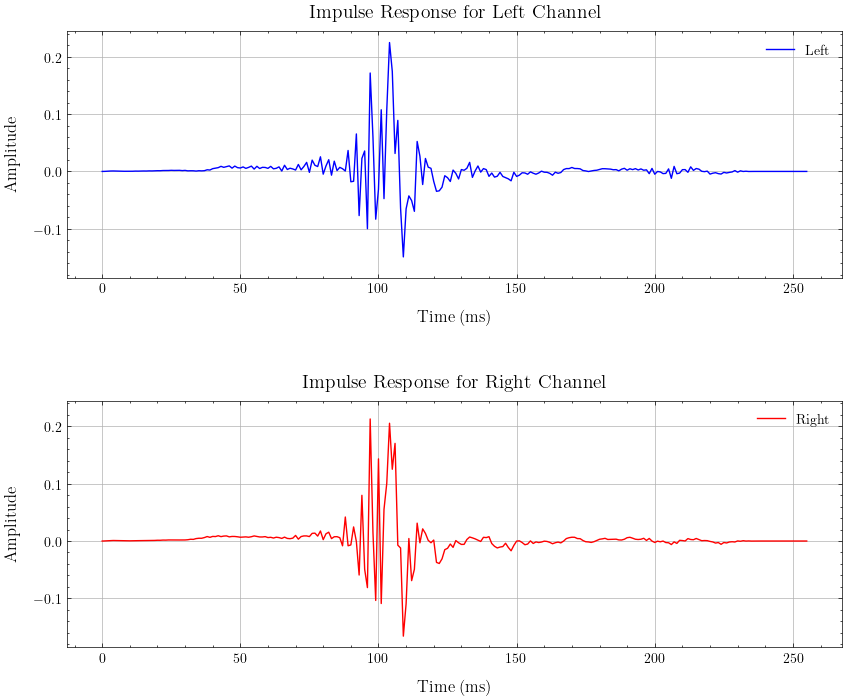

In [12]:
channel(dataset, center)

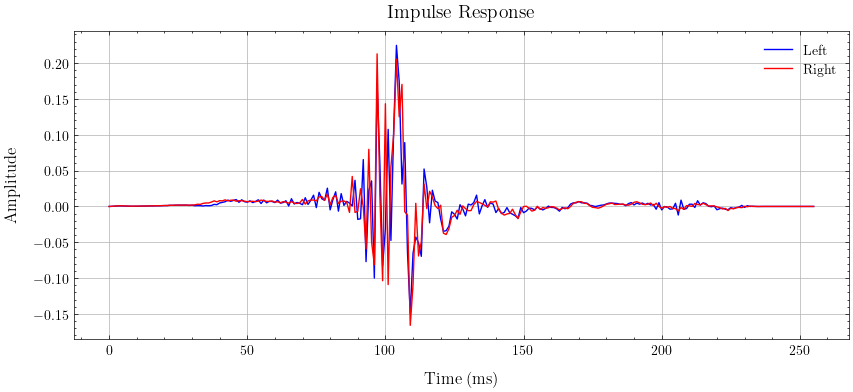

In [13]:
signal(dataset, center)

## Sound playback to the right of the individual

In [14]:
right = dataframe.loc[(dataframe.azimuth == 270) & (dataframe.elevation == elevation)]

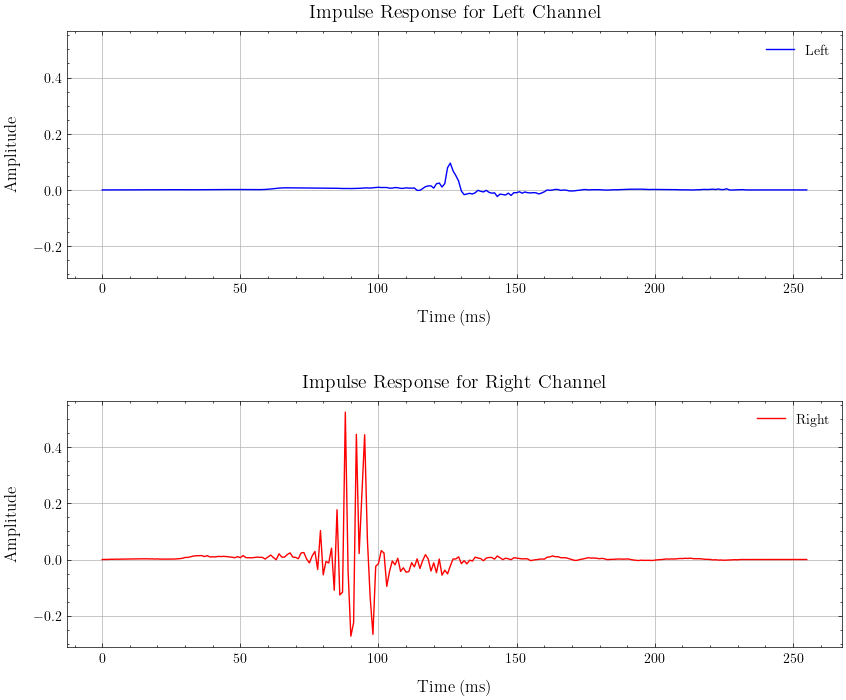

In [15]:
channel(dataset, right)

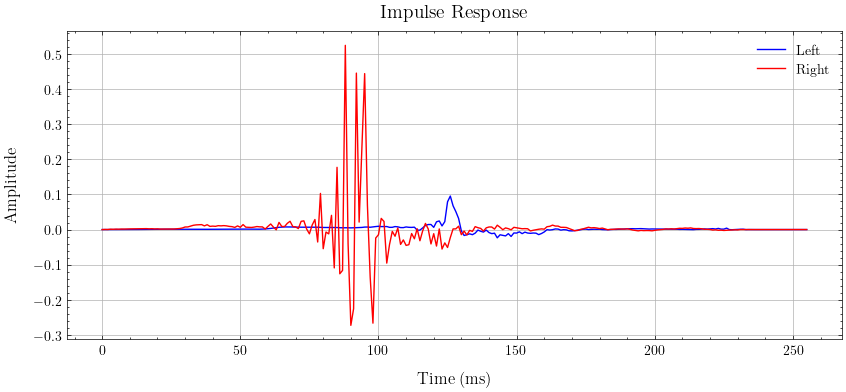

In [16]:
signal(dataset, right)

In [17]:
description = {
    'x': [0.00],
    'y': [0.00],
    'z': [0.00],
    'azimuth': [0.00],
    'elevation': [0.00],
    'radius': [0.00],
}

dataframe = pd.DataFrame(description)

In [18]:
file = MODEL.joinpath('scan.obj')

In [19]:
mesh = MeshTrace(file)
mesh = mesh.create()

In [20]:
source = SourceScatterTrace(dataset)
source = source.create()

In [21]:
transfer = TransferFunctionTrace()

In [22]:
builder = Builder(
    audio=audio,
    dataset=dataset,
    dataframe=dataframe,
    mesh=mesh,
    source=source,
    transfer=transfer 
)

interactive = Interactive(builder=builder)

widget = interactive.create()
display(widget)

HTML(value='\n            <style>\n                table {\n    margin: auto;\n    border-collapse: collapse;\…